[array([[0.01240224]]), array([[0.01240224]]), array([[0.00505911]]), array([[0.00505911]]), array([[0.00533808]]), array([[0.00715472]]), array([[0.00560492]])] [array([[0.01282365]]), array([[0.01282365]]), array([[0.00371516]]), array([[0.00371516]]), array([[0.00325252]]), array([[0.00336412]]), array([[0.00357995]])] [array([[0.01311933]]), array([[0.01311933]]), array([[0.00413912]]), array([[0.00413912]]), array([[0.00414175]]), array([[0.00361934]]), array([[0.00320667]])]


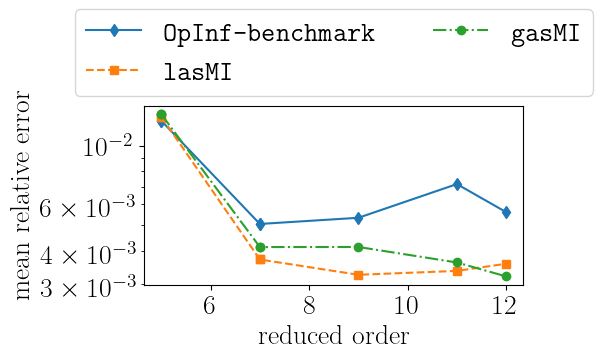

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from qs_opinf.constants import results_path

# import pandas as pd
from scipy.io import loadmat, savemat

font = {"family": "normal", "weight": "bold", "size": 20}

matplotlib.rc("font", **font)


matplotlib.rc("font", **font)
plt.rcParams["text.usetex"] = True

PATH1 = str(results_path / "Chafee/NoStability") + '/'
PATH2 = str(results_path / "Chafee/LocalStability") + '/' 
PATH3 = str(results_path / "Chafee/GlobalStability") + '/'

LABELS = [r"\texttt{OpInf-benchmark}", r"\texttt{lasMI}", r"\texttt{gasMI}"]
MARKERS = ["d", "s", "o"]
Err1 = []
Err2 = []
Err3 = []

Data1 = loadmat(PATH1 + f"simulation_error_order_12.mat")
reduced_orders = Data1["reduced_orders"].reshape(
    -1,
)

for r in reduced_orders:
    Data1 = loadmat(PATH1 + f"simulation_error_order_{r}.mat")
    Err1.append(Data1["errors"])

    Data2 = loadmat(PATH2 + f"simulation_error_order_{r}.mat")
    Err2.append(Data2["errors"])

    Data3 = loadmat(PATH3 + f"simulation_error_order_{r}.mat")
    Err3.append(Data3["errors"])

print(Err1, Err2, Err3)
fig, ax = plt.subplots(figsize=(6, 4.5))
ax.semilogy(
    reduced_orders,
    np.array(Err1).reshape(
        -1,
    ),
    linestyle="-",
    marker=MARKERS[0],
    label=LABELS[0],
)
ax.semilogy(
    reduced_orders,
    np.array(Err2).reshape(
        -1,
    ),
    linestyle="--",
    marker=MARKERS[1],
    label=LABELS[1],
)
ax.semilogy(
    reduced_orders,
    np.array(Err3).reshape(
        -1,
    ),
    linestyle="-.",
    marker=MARKERS[2],
    label=LABELS[2],
)
ax.set(xlabel="reduced order", ylabel="mean relative error")

ax.legend(loc="center", bbox_to_anchor=(0.5, 1.3), ncol=2, fancybox=True, shadow=False)
plt.tight_layout()
fig.savefig(PATH1 + "../" + f"compare_simulations.pdf", bbox_inches="tight")
fig.savefig(PATH1 + "../" + f"compare_simulations.png", dpi=300, bbox_inches="tight")


1.0397604549350254
0.9988733510189333
0.7525051241391355


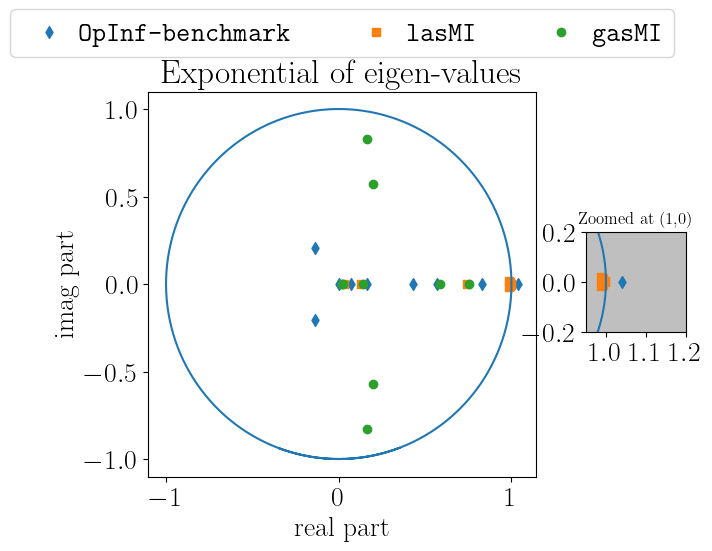

In [2]:
sele_r = 9
cir_pts = np.arange(-3.5, 3.5, 0.01)

Data1 = loadmat(PATH1 + f"simulation_error_order_{sele_r}.mat")
eigs1 = np.exp(Data1["eigs"])

Data2 = loadmat(PATH2 + f"simulation_error_order_{sele_r}.mat")
eigs2 = np.exp(Data2["eigs"])

Data3 = loadmat(PATH3 + f"simulation_error_order_{sele_r}.mat")
eigs3 = np.exp(Data3["eigs"])

print(np.max(np.real(eigs1)))
print(np.max(np.real(eigs2)))
print(np.max(np.real(eigs3)))

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(
    np.real(eigs1), np.imag(eigs1), linestyle="None", marker=MARKERS[0], label=LABELS[0]
)
ax.scatter(
    np.real(eigs2), np.imag(eigs2), linestyle="None", marker=MARKERS[1], label=LABELS[1]
)
ax.scatter(
    np.real(eigs3), np.imag(eigs3), linestyle="None", marker=MARKERS[2], label=LABELS[2]
)
ax.plot(np.sin(cir_pts), np.cos(cir_pts))
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.25),
    ncol=3,
    fancybox=True,
    shadow=False,
    handletextpad=0.1,
)
ax.set(title="Exponential of eigen-values", xlabel="real part", ylabel="imag part")

# location for the zoomed portion
sub_axes = plt.axes([1, 0.4, 0.2, 0.2])

# plot the zoomed portion
# sub_axes.plot(X_detail, Y_detail, c = 'k')


sub_axes.scatter(
    np.real(eigs1), np.imag(eigs1), linestyle="None", marker=MARKERS[0], label=LABELS[0]
)
sub_axes.scatter(
    np.real(eigs2), np.imag(eigs2), linestyle="None", marker=MARKERS[1], label=LABELS[1]
)
sub_axes.scatter(
    np.real(eigs3), np.imag(eigs3), linestyle="None", marker=MARKERS[2], label=LABELS[2]
)
sub_axes.plot(np.sin(cir_pts), np.cos(cir_pts))
sub_axes.patch.set_alpha(0.5)
sub_axes.set_xlim([0.95, 1.2])
sub_axes.set_ylim([-0.2, 0.2])
sub_axes.set_facecolor("grey")
sub_axes.set_title("Zoomed at (1,0)", fontsize=12)

fig.savefig(PATH1 + "../" + f"compare_eigenvalues.pdf", bbox_inches="tight")
fig.savefig(PATH1 + "../" + f"compare_eigenvalues.png", dpi=300, bbox_inches="tight")


In [3]:
Data1["eigs"], Data2["eigs"], Data3["eigs"]


(array([[-6.551926  +0.j       , -1.39262173+2.1661887j,
         -1.39262173-2.1661887j, -2.64951667+0.j       ,
         -1.80881821+0.j       , -0.84589619+0.j       ,
         -0.56434723+0.j       , -0.18892707+0.j       ,
          0.03899035+0.j       ]]),
 array([[-3.42490180e+00+0.j        , -2.05205427e+00+0.j        ,
         -2.96154299e-01+0.j        , -1.19174525e-02+0.01680777j,
         -1.19174525e-02-0.01680777j, -7.63399556e-03+0.01409954j,
         -7.63399556e-03-0.01409954j, -1.12327487e-03+0.0028317j ,
         -1.12327487e-03-0.0028317j ]]),
 array([[-3.71085205+0.j        , -3.87951765+0.j        ,
         -1.97778379+0.j        , -0.16873089+1.37246692j,
         -0.16873089-1.37246692j, -0.50015091+1.23684536j,
         -0.50015091-1.23684536j, -0.53603043+0.j        ,
         -0.28434747+0.j        ]]))

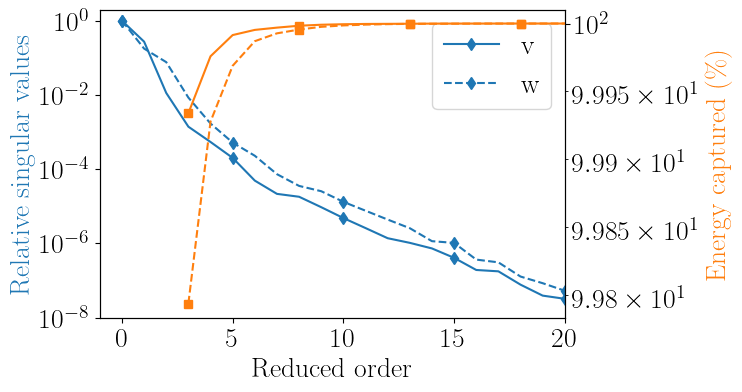

In [4]:
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

sing_vals1 = loadmat(PATH1 + f"simulation_error_order_5.mat")["sin_vals1"].reshape(
    -1, 1
)
sing_vals2 = loadmat(PATH1 + f"simulation_error_order_5.mat")["sin_vals2"].reshape(
    -1, 1
)

rsing_vals1 = sing_vals1 / sing_vals1[0]
rsing_vals2 = sing_vals2 / sing_vals2[0]

orders = np.arange(len(rsing_vals1))

energy_cap1 = np.zeros_like(sing_vals1)
energy_cap1[0] = rsing_vals1[0]

for i in range(1, len(energy_cap1)):
    energy_cap1[i] = energy_cap1[i - 1] + rsing_vals1[i]


energy_cap2 = np.zeros_like(sing_vals2)
energy_cap2[0] = rsing_vals2[0]

for i in range(1, len(energy_cap2)):
    energy_cap2[i] = energy_cap2[i - 1] + rsing_vals2[i]

fig, ax = plt.subplots(figsize=(6, 4))
ax.semilogy(
    orders[:40], rsing_vals1[:40], color=colors[0], marker="d", markevery=5, label="v"
)
ax.semilogy(
    orders[:40],
    rsing_vals2[:40],
    "--",
    color=colors[0],
    marker="d",
    markevery=5,
    label="w",
)

ax.set_xlabel("Reduced order")
ax.set_ylabel("Relative singular values", color=colors[0])

ax2 = ax.twinx()

ax2.semilogy(
    orders[3:],
    100 * energy_cap1[3:] / sum(rsing_vals1),
    color=colors[1],
    marker="s",
    markevery=5,
)
ax2.set_ylabel("Energy captured (\%)", color=colors[1])

ax2.semilogy(
    orders[3:],
    100 * energy_cap2[3:] / sum(rsing_vals2),
    "--",
    color=colors[1],
    marker="s",
    markevery=5,
)
ax2.set_ylabel("Energy captured (\%)", color=colors[1])

ax.set_xlim([-1, 20])
ax.set_ylim([1e-8, 2e0])
ax.legend()

fig.savefig(PATH1 + "../" + f"singular_value_decay.pdf", bbox_inches="tight")
fig.savefig(PATH1 + "../" + f"singular_value_decay.png", dpi=300, bbox_inches="tight")
